# Dimensionality Reduction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import ipyvolume.pylab as p3
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
# Create an instance of the PCA class
pca = PCA()

In [3]:
mpl.rcParams.update({'font.size':16})

# A function for plotting 3-dimensional data
def plot3d(data):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*data.T)
    minn,maxx = data.min(),data.max()
    ax.set_xlim(minn,maxx)
    ax.set_ylim(minn,maxx)
    ax.set_zlim(minn,maxx)
    
def plot3d_live(data):
    fig = p3.figure(figsize=(8,8))
    q = p3.scatter(*data.T, size=1, marker="sphere")
    minn,maxx = data.min(),data.max()
    p3.xlim(minn,maxx)
    p3.ylim(minn,maxx)
    p3.zlim(minn,maxx)
    p3.style.use("dark") # looks better
    p3.show()
    
# A function for summarizing covariancs and correlations
def summarize(info,name,quiet=False):
    values = info[name]
    if not quiet:
        print(values.round(2))
    plt.pcolor(values,cmap='RdBu_r',vmin=-values.max(),vmax=values.max())
    raynge = np.arange(values.shape[0])
    if not quiet:
        plt.xticks(raynge+0.5,[chr(88+i) for i in raynge])
        plt.yticks(raynge+0.5,[chr(88+i) for i in raynge])
    else:
        plt.xticks([])
        plt.yticks([])
    plt.xlabel('Dimension')
    plt.xlabel('Dimension')
    plt.gca().invert_yaxis() # Make y-axis go from low to high like a matrix
    plt.colorbar().set_label(name)
    eigenvalues,_ = np.linalg.eig(info[name])
    if not quiet:
        for i,eig in enumerate(sorted(eigenvalues,reverse=True)):
            print('Eigenvalue #%d is %.3g' % (i+1,eig))
        
def report_mean_var(data):
    for i in range(data.shape[1]):
        column = data[:,i]
        print("Dimension %d has mean %.2g and variance %.3g" % \
              (i+1,column.mean(),column.var()))

## Generate and plot some random data

Dimension 1 has mean 0.26 and variance 12.5
Dimension 2 has mean 0.27 and variance 4
Dimension 3 has mean -0.12 and variance 0.963


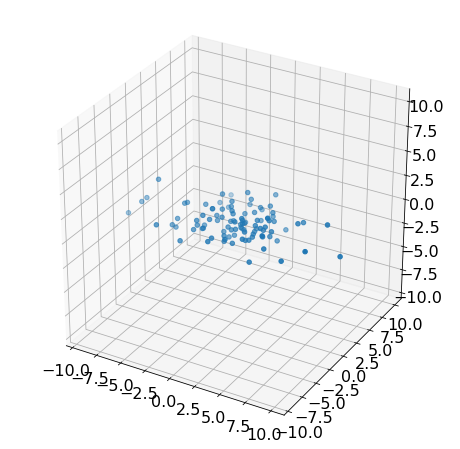

In [4]:
data = np.random.randn(100,3) # 100 data points, each with x, y, z values.  
data[:, 0] *= 4
data[:, 1] *= 2
plot3d(data)
report_mean_var(data)

### Interactive 3D plot

In [5]:
plot3d_live(data)

## These data points could be features of something we care about

In [6]:
df = pd.DataFrame(data, columns=['Hippocampal activation', 'Relative Age', 'Task accuracy'])
df.index.name = 'Person #'
df.head()

,Hippocampal activation,Relative Age,Task accuracy
Person #,,,
0,1.423977,-0.683373,1.120599
1,2.039354,0.252941,-0.767072
2,0.018455,1.558426,-1.021541
3,1.287675,2.130622,-1.399192
4,5.992627,2.103337,0.628842


## This randomly generated data has uncorrelated features

[[ 1.    0.    0.18]
 [ 0.    1.   -0.1 ]
 [ 0.18 -0.1   1.  ]]
Eigenvalue #1 is 1.2
Eigenvalue #2 is 1
Eigenvalue #3 is 0.798


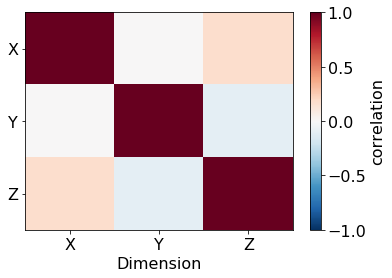

In [9]:
info = {}
info['correlation'] = np.corrcoef(data.T)
summarize(info,'correlation')

## But some features carry more of the data's variance than others (x > y > z)

[[12.58  0.03  0.62]
 [ 0.03  4.04 -0.19]
 [ 0.62 -0.19  0.97]]
Eigenvalue #1 is 12.6
Eigenvalue #2 is 4.05
Eigenvalue #3 is 0.929


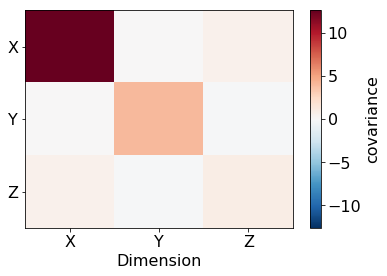

In [10]:
info = {}
info['covariance'] = np.cov(data.T)
summarize(info,'covariance')

## Create new data, this time with correlations between features

Dimension 1 has mean 0.26 and variance 12.5
Dimension 2 has mean 0.27 and variance 4
Dimension 3 has mean 0.37 and variance 8.26


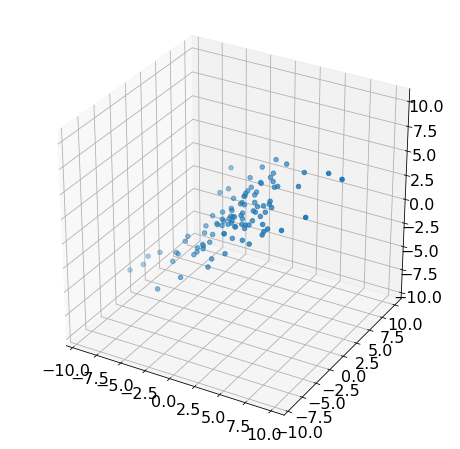

In [11]:
data[:,2] = (data[:,0] + data[:,1])/np.sqrt(2)
plot3d(data)
report_mean_var(data)

In [12]:
plot3d_live(data)

## The dataset now has non-zero covariance between features 

[[12.58  0.03  8.92]
 [ 0.03  4.04  2.88]
 [ 8.92  2.88  8.34]]
Eigenvalue #1 is 19.8
Eigenvalue #2 is 5.12
Eigenvalue #3 is 2.41e-15


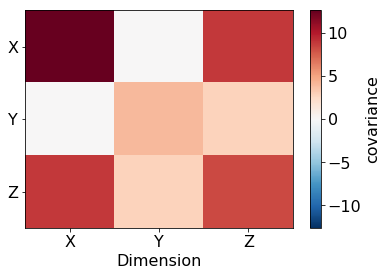

In [13]:
info['covariance'] = np.cov(data.T)
summarize(info,'covariance')

In [ ]:
## Now let's find a better set of features 
### - This new set of features -- built from the old -- will reduce the dimensionality of the data

In [14]:
pca.fit(data);

In [ ]:
### And let's rotate the cloud of data points until of the axes (new features) accounts for none of the variance

In [15]:
data_rotated = np.dot(pca.components_,data.T).T
report_mean_var(data_rotated)

Dimension 1 has mean -0.46 and variance 19.6
Dimension 2 has mean 0.25 and variance 5.07
Dimension 3 has mean -7.5e-17 and variance 2.47e-31


In [16]:
plot3d_live(data_rotated)

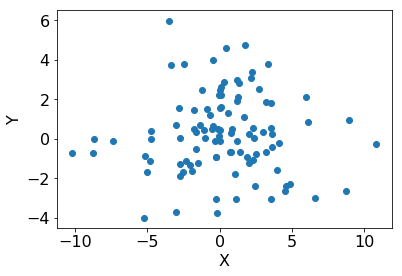

In [17]:
# Get rid of the z-axis
data_with_no_z = data[:,:2]
plt.scatter(*data_with_no_z.T);
plt.xlabel('X')
plt.ylabel('Y');

Dimension 0 explains 0.79 of the variance
Dimension 1 explains 0.21 of the variance
Dimension 2 explains 8.3e-33 of the variance


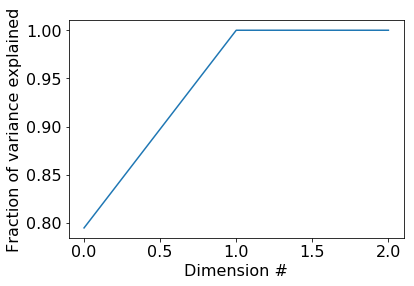

In [21]:
for i,value in enumerate(pca.explained_variance_ratio_):
    print("Dimension %d explains %.2g of the variance" % (i,value))
plt.plot(pca.explained_variance_ratio_.cumsum());
plt.xlabel('Dimension #')
plt.ylabel('Fraction of variance explained');